In [102]:
from datasets import load_dataset

dataset = load_dataset("nexar-ai/nexar_collision_prediction", split="train")

print(dataset.cache_files)
print(dataset.column_names)
print(len(dataset))

train_valid = dataset.train_test_split(test_size=0.25, seed=42)
train_dataset = train_valid['train']
valid_dataset = train_valid['test']
print("train length:", len(train_dataset))
print("valid length:", len(valid_dataset))

[{'filename': 'C:\\Users\\USER\\.cache\\huggingface\\datasets\\nexar-ai___nexar_collision_prediction\\default\\0.0.0\\aa97deda5a59f00bb7187739053b7c72e14374df\\nexar_collision_prediction-train.arrow'}]
['video', 'time_of_event', 'time_of_alert', 'light_conditions', 'weather', 'scene', 'time_to_accident']
1500
train length: 1125
valid length: 375


In [103]:
test_dataset = load_dataset("nexar-ai/nexar_collision_prediction", split="test")
print(len(test_dataset))

1344


### Metadata

In [104]:
import os
import pandas as pd

base_dir = r"C:\\Users\\USER\\.cache\\huggingface\\hub\datasets--nexar-ai--nexar_collision_prediction\\snapshots\\aa97deda5a59f00bb7187739053b7c72e14374df\\train"

pos_dir = os.path.join(base_dir, "positive")
neg_dir = os.path.join(base_dir, "negative")

pos_meta = pd.read_csv(os.path.join(pos_dir, "metadata.csv"))
neg_meta = pd.read_csv(os.path.join(neg_dir, "metadata.csv"))

In [105]:
meta = pd.concat([pos_meta.assign(folder=pos_dir), neg_meta.assign(folder=neg_dir)], ignore_index=True)

meta.drop(["time_of_alert", "time_to_accident"], axis=1, inplace=True)

print("Total videos:", len(meta))
meta.head()

Total videos: 1500


,file_name,time_of_event,light_conditions,weather,scene,folder
0,00822.mp4,19.500,Normal,Cloudy,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\data...
1,00208.mp4,19.800,Normal,Cloudy,Sub-urban,C:\\Users\\USER\\.cache\\huggingface\\hub\data...
2,00072.mp4,20.101,Normal,Clear,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\data...
3,00128.mp4,19.267,Normal,Clear,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\data...
4,00205.mp4,21.146,Normal,Clear,Highway,C:\\Users\\USER\\.cache\\huggingface\\hub\data...


In [106]:
meta.describe()

,time_of_event
count,750.000000
mean,19.101628
std,3.565120
min,3.032000
25%,19.133000
50%,19.802000
75%,20.333000
max,56.800000


In [131]:
meta.light_conditions.value_counts()

light_conditions
Normal      1355
Twilight      88
Dark          47
Bright        10
Name: count, dtype: int64

In [132]:
meta.weather.value_counts()

weather
Clear     919
Cloudy    495
Rain       83
Snow        1
Name: count, dtype: int64

In [133]:
meta['weather'] = meta['weather'].replace({'Snow': 'Rain'})
meta.weather.value_counts()

weather
Clear     919
Cloudy    495
Rain       84
Name: count, dtype: int64

In [134]:
meta.scene.value_counts()

scene
Urban         784
Highway       379
Sub-urban     271
Other          34
Rural          18
Industrial     13
Nature          1
Name: count, dtype: int64

In [135]:
meta['scene'] = meta['scene'].replace({'Nature': 'Rural'})
meta.scene.value_counts()

scene
Urban         784
Highway       379
Sub-urban     271
Other          34
Rural          19
Industrial     13
Name: count, dtype: int64

In [136]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         1500 non-null   object 
 1   time_of_event     750 non-null    float64
 2   light_conditions  1500 non-null   object 
 3   weather           1498 non-null   object 
 4   scene             1500 non-null   object 
 5   folder            1500 non-null   object 
dtypes: float64(1), object(5)
memory usage: 70.4+ KB


In [137]:
light_conditions_order = {"Normal": 0, "Twilight": 1, "Dark": 2, "Bright": 3}
meta["light_conditions"] = meta["light_conditions"].map(light_conditions_order)

weather_order = {"Clear": 0, "Cloudy": 1, "Rain": 2}
meta["weather"] = meta["weather"].map(weather_order)

scene_order = {"Urban": 0, "Highway": 1, "Sub-urban": 2, "Other": 3, "Rural": 4, "Industrial": 5}
meta["scene"] = meta["scene"].map(scene_order)

meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         1500 non-null   object 
 1   time_of_event     750 non-null    float64
 2   light_conditions  1500 non-null   int64  
 3   weather           1498 non-null   float64
 4   scene             1500 non-null   int64  
 5   folder            1500 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 70.4+ KB


In [155]:
test_dir = r"C:\\Users\\USER\\.cache\\huggingface\\hub\\datasets--nexar-ai--nexar_collision_prediction\\snapshots\\aa97deda5a59f00bb7187739053b7c72e14374df\\test-public"

pos_dir_tst = os.path.join(test_dir, "positive")
neg_dir_tst = os.path.join(test_dir, "negative")

pos_meta_tst = pd.read_csv(os.path.join(pos_dir_tst, "metadata.csv"))
neg_meta_tst = pd.read_csv(os.path.join(neg_dir_tst, "metadata.csv"))


test_dir_pr = r"C:\\Users\\USER\\.cache\\huggingface\\hub\\datasets--nexar-ai--nexar_collision_prediction\\snapshots\\aa97deda5a59f00bb7187739053b7c72e14374df\\test-private"

pos_dir_tst_pr = os.path.join(test_dir_pr, "positive")
neg_dir_tst_pr = os.path.join(test_dir_pr, "negative")

pos_meta_tst_pr = pd.read_csv(os.path.join(pos_dir_tst_pr, "metadata.csv"))
neg_meta_tst_pr = pd.read_csv(os.path.join(neg_dir_tst_pr, "metadata.csv"))

meta_test = pd.concat([pos_meta_tst.assign(folder=pos_dir_tst), neg_meta_tst.assign(folder=neg_dir_tst), 
                       pos_meta_tst_pr.assign(folder=pos_dir_tst_pr), neg_meta_tst_pr.assign(folder=neg_dir_tst_pr)], ignore_index=True)

meta_test.drop(["time_of_alert", "time_to_accident"], axis=1, inplace=True)

print("Total test videos:", len(meta_test))
meta_test.head()

Total test videos: 1344


,file_name,time_of_event,light_conditions,weather,scene,folder
0,00002.mp4,21.324,Normal,Clear,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\\dat...
1,00009.mp4,18.385,Normal,Rain,Highway,C:\\Users\\USER\\.cache\\huggingface\\hub\\dat...
2,00020.mp4,19.789,Normal,Rain,Other,C:\\Users\\USER\\.cache\\huggingface\\hub\\dat...
3,00030.mp4,20.232,Normal,Clear,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\\dat...
4,00035.mp4,20.000,Normal,Cloudy,Urban,C:\\Users\\USER\\.cache\\huggingface\\hub\\dat...


In [156]:
light_conditions_order = {"Normal": 0, "Twilight": 1, "Dark": 2, "Bright": 3}
meta_test["light_conditions"] = meta_test["light_conditions"].map(light_conditions_order)

weather_order = {"Clear": 0, "Cloudy": 1, "Rain": 2}
meta_test["weather"] = meta_test["weather"].map(weather_order)

scene_order = {"Urban": 0, "Highway": 1, "Sub-urban": 2, "Other": 3, "Rural": 4, "Industrial": 5}
meta_test["scene"] = meta_test["scene"].map(scene_order)

meta_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         1344 non-null   object 
 1   time_of_event     672 non-null    float64
 2   light_conditions  1344 non-null   int64  
 3   weather           1341 non-null   float64
 4   scene             1344 non-null   int64  
 5   folder            1344 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 63.1+ KB


### Video Generator

In [117]:
import cv2
import numpy as np

def video_batch_generator(meta_df, batch_size=8, num_frames=16, seconds_before=5, seconds_after=5, target_size=(224, 224)):
    n = len(meta_df)
    for start_idx in range(0, n, batch_size):
        batch_meta = meta_df.iloc[start_idx : start_idx + batch_size]
        batch_videos = []
        batch_labels = []
        batch_metadata = []
        skipped_video_counter=0

        for _, row in batch_meta.iterrows():
            video_path = os.path.join(row["folder"], row["file_name"])
            time_of_event = row["time_of_event"]

            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Skipping unreadable video: {video_path}")
                skipped_video_counter+=1
                continue

            fps = cap.get(cv2.CAP_PROP_FPS)
            n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            duration = n_frames / fps

            if time_of_event is not None and not np.isnan(time_of_event):
                label = 1
                if (time_of_event - seconds_before) < 0:
                    start_time = 0
                else:
                    start_time = time_of_event - seconds_before

                if (time_of_event + seconds_after) > duration:
                    end_time = duration
                else:
                    end_time = time_of_event + seconds_after

            else:
                # if no accident
                start_time = 0
                end_time = duration
                label = 0


            start_frame = int(start_time * fps)
            end_frame = int(end_time * fps)

            selected_frames = np.linspace(start_frame, end_frame - 1, num_frames, dtype=int)

            frames = []
            cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
            current_idx = start_frame
            flag, frame = cap.read()

            while flag and current_idx <= end_frame:
                if current_idx in selected_frames:
                    frame = cv2.resize(frame, target_size)
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frames.append(frame)
                    if len(frames) == num_frames:
                        break
                flag, frame = cap.read()
                current_idx += 1

            cap.release()

            if len(frames) != num_frames:
                print(f"Skipping {video_path} (got only {len(frames)} frames)")
                continue

            # max_frames = int((seconds_before + seconds_after) * fps)
            # frames = np.array(frames, dtype=np.float32) / 255.0
            # if len(frames) < max_frames:
            #     pad = np.zeros((max_frames - len(frames), *frames.shape[1:]), dtype=np.float32)
            #     frames = np.concatenate([frames, pad], axis=0)

            batch_videos.append(np.array(frames))
            batch_labels.append(label)
            batch_metadata.append(row.to_dict())

        if batch_videos:
            yield np.array(batch_videos), np.array(batch_labels), batch_metadata

In [120]:
from tqdm import tqdm

train_gen = video_batch_generator(meta, batch_size=4)
total_videos = 0
n_total = len(meta)

with tqdm(total=n_total, desc="Processing videos", unit="video") as pbar:
    for X_batch, y_batch, batch_metadata in train_gen:
        if len(X_batch) == 0:
            continue

        total_videos += len(X_batch)
        pbar.update(len(X_batch))

        if total_videos >= n_total:
            break

print("Total videos processed:", total_videos)
print("Expected videos:", n_total)


Processing videos: 100%|██████████| 1500/1500 [1:47:21<00:00,  4.29s/video]

Total videos processed: 1500
Expected videos: 1500


In [124]:
X_batch, y_batch, meta_batch = next(video_batch_generator(meta, batch_size=4))
print(X_batch.shape, y_batch.shape)

(4, 16, 224, 224, 3) (4,)


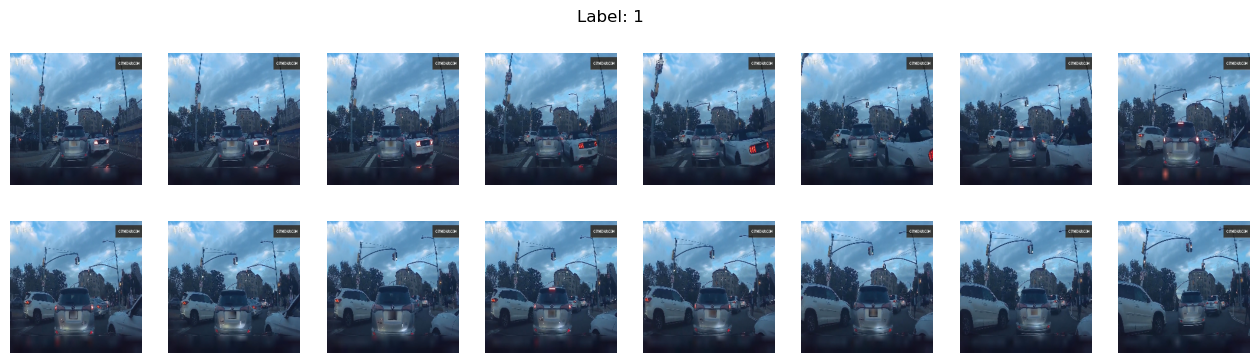

In [123]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 8, figsize=(16, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_batch[0][i].astype('uint8'))
    ax.axis('off')

plt.suptitle(f"Label: {y_batch[0]}")
plt.show()

In [157]:
def video_batch_generator_test(meta_df, batch_size=8, num_frames=16, target_size=(224, 224)):
    n = len(meta_df)
    for start_idx in range(0, n, batch_size):
        batch_meta = meta_df.iloc[start_idx : start_idx + batch_size]
        batch_videos, batch_labels, batch_metadata = [], [], []
        skipped_video_counter = 0

        for _, row in batch_meta.iterrows():
            video_path = os.path.join(row["folder"], row["file_name"])
            
            label = 1 if "positive" in row["folder"].lower() else 0

            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                skipped_video_counter += 1
                continue

            n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            selected_frames = np.linspace(0, n_frames - 1, num_frames, dtype=int)

            frames = []
            flag, frame = cap.read()
            frame_idx = 0

            while flag:
                if frame_idx in selected_frames:
                    frame = cv2.resize(frame, target_size)
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frames.append(frame)
                    if len(frames) == num_frames:
                        break
                flag, frame = cap.read()
                frame_idx += 1

            cap.release()

            if len(frames) != num_frames:
                continue

            batch_videos.append(np.array(frames))
            batch_labels.append(label)
            batch_metadata.append(row.to_dict())

        if batch_videos:
            yield np.array(batch_videos), np.array(batch_labels), batch_metadata

In [158]:
from tqdm import tqdm

train_gen_tst = video_batch_generator_test(meta_test, batch_size=4)
total_videos_tst = 0
n_total_tst = len(meta_test)

with tqdm(total=n_total_tst, desc="Processing videos", unit="video") as pbar:
    for X_batch_tst, y_batch_tst, batch_metadata_tst in train_gen_tst:
        if len(X_batch_tst) == 0:
            continue

        total_videos_tst += len(X_batch_tst)
        pbar.update(len(X_batch_tst))

        if total_videos_tst >= n_total_tst:
            break

print("Total test videos processed:", total_videos_tst)
print("Expected test videos:", n_total_tst)

Processing videos: 100%|██████████| 1344/1344 [37:25<00:00,  1.67s/video]

Total test videos processed: 1344
Expected test videos: 1344


In [139]:
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dropout

cnn_base = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224,224,3))
cnn_base.trainable = False

# input 16 frames
video_input = Input(shape=(16,224,224,3))

x = layers.TimeDistributed(cnn_base)(video_input)
x = layers.LSTM(128)(x) 
x = Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(video_input, output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 16, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 16, 1280)       │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │       721,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,987,713 (11.40 MB)

 Trainable params: 729,729 (2.78 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

train_meta, val_meta = train_test_split(meta, test_size=0.25, random_state=42, shuffle=True)

print(f"Training videos: {len(train_meta)}")
print(f"Validation videos: {len(val_meta)}")

Training videos: 1125
Validation videos: 375


In [98]:
def gen_wrapper(generator):
    for X_batch, y_batch, _ in generator:
        yield X_batch, y_batch

train_gen_keras = gen_wrapper(video_batch_generator(train_meta, batch_size=8))
val_gen_keras = gen_wrapper(video_batch_generator(val_meta, batch_size=8))

steps_per_epoch = len(train_meta) // 8
val_steps = len(val_meta) // 8

In [99]:
history = model.fit(train_gen_keras, validation_data=val_gen_keras, steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps, epochs=4)

Epoch 1/4
140/140 ━━━━━━━━━━━━━━━━━━━━ 6457s 46s/step - accuracy: 0.5116 - loss: 0.7060 - val_accuracy: 0.6576 - val_loss: 0.6712
Epoch 2/4
  1/140 ━━━━━━━━━━━━━━━━━━━━ 3:29 2s/step - accuracy: 0.6000 - loss: 0.6612

c:\Users\USER\miniconda3\envs\accident_env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


140/140 ━━━━━━━━━━━━━━━━━━━━ 39s 268ms/step - accuracy: 0.6000 - loss: 0.6612 - val_accuracy: 0.6250 - val_loss: 0.6806
Epoch 3/4
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.4375 - loss: 0.7322 - val_accuracy: 0.5625 - val_loss: 0.6820
Epoch 4/4
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.6250 - loss: 0.6503 - val_accuracy: 0.5625 - val_loss: 0.6875


In [143]:
def train_gen_keras():
    return gen_wrapper(video_batch_generator(train_meta, batch_size=4))

def val_gen_keras():
    return gen_wrapper(video_batch_generator(val_meta, batch_size=4))

steps_per_epoch = len(train_meta) // 4
val_steps = len(val_meta) // 4

n_epoch = 4

for epoch in range(n_epoch):
    print(f"\n===== Epoch {epoch+1}/{n_epoch} =====")
    history = model.fit(
        train_gen_keras(),
        validation_data=val_gen_keras(),
        steps_per_epoch=steps_per_epoch,
        validation_steps=val_steps,
        epochs=1)


===== Epoch 1/4 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 6255s 22s/step - accuracy: 0.5605 - loss: 0.6919 - val_accuracy: 0.6210 - val_loss: 0.6724

===== Epoch 2/4 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 6175s 22s/step - accuracy: 0.5765 - loss: 0.6788 - val_accuracy: 0.6452 - val_loss: 0.6668

===== Epoch 3/4 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 6282s 22s/step - accuracy: 0.5765 - loss: 0.6702 - val_accuracy: 0.6505 - val_loss: 0.6564

===== Epoch 4/4 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 7560s 27s/step - accuracy: 0.6068 - loss: 0.6595 - val_accuracy: 0.6505 - val_loss: 0.6441


In [153]:
# # Plot accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training vs Validation Accuracy')
# plt.legend()
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training vs Validation Loss')
# plt.legend()
# plt.show()

In [145]:
model.save("model_v1.h5")

In [148]:
model.save("model_v1.keras")

In [149]:
from tensorflow.keras.models import load_model


model = load_model("model_v1.keras")

def train_gen_keras():
    return gen_wrapper(video_batch_generator(train_meta, batch_size=4))

def val_gen_keras():
    return gen_wrapper(video_batch_generator(val_meta, batch_size=4))

steps_per_epoch = len(train_meta) // 4
val_steps = len(val_meta) // 4
n_epoch = 2


all_history = {
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []}

for epoch in range(n_epoch):
    print(f"\n===== Epoch {epoch+1}/{n_epoch} =====")

    history = model.fit(
        train_gen_keras(),
        validation_data=val_gen_keras(),
        shuffle=True,
        steps_per_epoch=steps_per_epoch,
        validation_steps=val_steps,
        epochs=1)

    for key in all_history:
        all_history[key].extend(history.history.get(key, []))


===== Epoch 1/2 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 6148s 22s/step - accuracy: 0.6343 - loss: 0.6409 - val_accuracy: 0.5538 - val_loss: 0.7010

===== Epoch 2/2 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 5939s 21s/step - accuracy: 0.6601 - loss: 0.6283 - val_accuracy: 0.5565 - val_loss: 0.6928


In [150]:
model.save("model_v2.keras")

In [151]:
model = load_model("model_v2.keras")

In [154]:
n_epoch=1
for epoch in range(n_epoch):
    print(f"\n===== Epoch {epoch+1}/{n_epoch} =====")

    history = model.fit(
        train_gen_keras(),
        validation_data=val_gen_keras(),
        steps_per_epoch=steps_per_epoch,
        validation_steps=val_steps,
        epochs=1
    )

    for key in all_history:
        all_history[key].extend(history.history.get(key, []))


===== Epoch 1/1 =====
281/281 ━━━━━━━━━━━━━━━━━━━━ 7224s 26s/step - accuracy: 0.6593 - loss: 0.6288 - val_accuracy: 0.5618 - val_loss: 0.7024


In [ ]:
def test_gen_keras():
    return gen_wrapper(video_batch_generator_test(meta_test, batch_size=4))


test_steps = len(meta_test) // 4
test_loss, test_acc = model.evaluate(test_gen_keras(), steps=test_steps)
print(f"Test Accuracy: {test_acc:.4f}")